In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

## Загрузка данных и первичный осмотр

In [2]:
df = pd.read_csv('S02-hw-dataset.csv')

In [13]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [14]:
df = df.set_index('user_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1 to 10
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        39 non-null     float64
 1   country    41 non-null     object 
 2   purchases  41 non-null     int64  
 3   revenue    41 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [15]:
df.describe()

,age,purchases,revenue
count,39.000000,41.000000,41.000000
mean,36.512821,4.829268,820.048780
std,18.304259,2.710189,613.127269
min,5.000000,-1.000000,0.000000
25%,24.000000,3.000000,432.000000
50%,33.000000,5.000000,693.000000
75%,45.500000,7.000000,1115.000000
max,120.000000,11.000000,2475.000000


## Пропуски, дубликаты и базовый контроль качества

In [16]:
df.isna().mean()

age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [17]:
df.duplicated()

user_id
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
10     True
dtype: bool

In [18]:
df['purchases'].min()

-1

In [19]:
df['age'].max()

120.0

In [20]:
df[(df['purchases'] <= 0) & (df['revenue'] > 0)]

,age,country,purchases,revenue
user_id,,,,
6,120.0,FR,-1,785


In [21]:
df[(df['purchases'] > 0) & (df['revenue'] <= 0)]

,age,country,purchases,revenue
user_id,,,,
11,24.0,US,4,0


В данном датасете содержатся пропуски в столбце age (2 штуки, ~5%), также содержится одна дублирующая строка, которая обладает в том числе и неуникальным индексом.  
Также датасете содержатся различные аномалии: количество покупок принимает отрицательное значнение, возраст принимает значение больше 100, а также 5, содержится строка, в которой при отрицательном (!) значении количества покупок содержится ненулевое значение прибыли, также имеется строка, в которой 0 прибыли при четырех покупках.

## Базовый EDA: группировки, агрегаты и частоты

In [35]:
df['age'].value_counts().sort_index()

age
5.0      1
18.0     1
20.0     1
21.0     1
22.0     1
23.0     1
24.0     5
25.0     1
26.0     1
28.0     2
31.0     2
32.0     2
33.0     1
34.0     1
35.0     2
36.0     1
39.0     2
42.0     1
43.0     1
45.0     1
46.0     1
47.0     2
51.0     1
52.0     2
54.0     1
55.0     1
57.0     1
120.0    1
Name: count, dtype: int64

In [26]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [62]:
df.groupby('country')['revenue'].agg(['sum', 'mean']).sort_values(['sum', 'mean'], ascending=False)

,sum,mean
country,,
RU,10271,790.076923
DE,8673,1445.500000
FR,8111,675.916667
US,4459,557.375000
CN,2108,1054.000000


In [61]:
df.groupby('age')['revenue'].agg(['sum', 'mean']).sort_values(['sum', 'mean'], ascending=False)

,sum,mean
age,,
32.0,4083,2041.5
36.0,2358,2358.0
39.0,2142,1071.0
24.0,2137,427.4
34.0,2086,2086.0
47.0,1872,936.0
20.0,1652,1652.0
5.0,1488,1488.0
54.0,1302,1302.0


In [57]:
bins = [0, 25, 35, 50, 120]
labels = ['18-25 (Young)', '26-35 (Middle)', '36-50 (Senior)', '51+ (Elderly)']
df['age_group'] = pd.cut(
    df['age'], 
    bins=bins, 
    labels=labels, 
    right=True,  # Включать правую границу
    include_lowest=True # Включать самую нижнюю границу
)
df['age_group']

user_id
1      18-25 (Young)
2      18-25 (Young)
3      51+ (Elderly)
4     26-35 (Middle)
5                NaN
6      51+ (Elderly)
7     36-50 (Senior)
8     26-35 (Middle)
9     36-50 (Senior)
10     18-25 (Young)
11     18-25 (Young)
12     18-25 (Young)
13               NaN
14    36-50 (Senior)
15     51+ (Elderly)
16     18-25 (Young)
17    26-35 (Middle)
18     18-25 (Young)
19    36-50 (Senior)
20    26-35 (Middle)
21     18-25 (Young)
22    26-35 (Middle)
23    36-50 (Senior)
24    26-35 (Middle)
25     18-25 (Young)
26    26-35 (Middle)
27     51+ (Elderly)
28    36-50 (Senior)
29    36-50 (Senior)
30     51+ (Elderly)
31     51+ (Elderly)
32    26-35 (Middle)
33     18-25 (Young)
34    26-35 (Middle)
35    36-50 (Senior)
36     51+ (Elderly)
37     18-25 (Young)
38    26-35 (Middle)
39    36-50 (Senior)
40    26-35 (Middle)
10     18-25 (Young)
Name: age_group, dtype: category
Categories (4, object): ['18-25 (Young)' < '26-35 (Middle)' < '36-50 (Senior)' < '51+ (Elderly)']

In [58]:
df.groupby('age_group')['revenue'].agg(['count', 'sum', 'mean'])

C:\Users\artem\AppData\Local\Temp\ipykernel_60552\66713119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['revenue'].agg(['count', 'sum', 'mean'])


,count,sum,mean
age_group,,,
18-25 (Young),12,8408,700.666667
26-35 (Middle),11,10415,946.818182
36-50 (Senior),9,8508,945.333333
51+ (Elderly),7,4365,623.571429


In [66]:
df.groupby(['age_group', 'country'])['revenue'].agg(['mean', 'sum'])

C:\Users\artem\AppData\Local\Temp\ipykernel_60552\1959155046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'country'])['revenue'].agg(['mean', 'sum'])


mean   sum
age_group      country               
18-25 (Young)  CN       1652.00  1652
               DE       1104.00  1104
               FR        466.00   932
               RU        712.50  4275
               US        222.50   445
26-35 (Middle) CN        456.00   456
               DE       1606.50  3213
               FR        718.00  2154
               RU       1065.50  4262
               US        330.00   330
36-50 (Senior) CN           NaN     0
               DE       2358.00  2358
               FR       1002.00  3006
               RU        216.00   432
               US        904.00  2712
51+ (Elderly)  CN           NaN     0
               DE        702.00   702
               FR        504.75  2019
               RU       1302.00  1302
               US        342.00   342

Среди стран клиентов доминируют Россия и Франция. Больше всего прибыли принесли клиенты с возрастом 32, а самой прибыльной страной оказалась Россия. Наибольшая средняя прибыль от покупателей из Германии.  
Также данные были разбиты по возрастным группам. Наиболее прибыльной оказалась средняя возрастная группа (26-35 лет), она же и приносит больше прибыли в среднем. Из неожиданных эффектов можно выделить отсутствие возраста у двух клиентов, что привело к невозможности определить их в возрастную группу, поэтому понадобится отдельная группа для таких случаев (например "другие" или "неизвестный возраст").

# Визуализация данных в Matplotlib

In [134]:
# Для визуализаций нужны age, revenue и country. Удаляем строки с NaN в этих колонках.
viz_df = df.dropna(subset=['age', 'revenue', 'country']).copy()

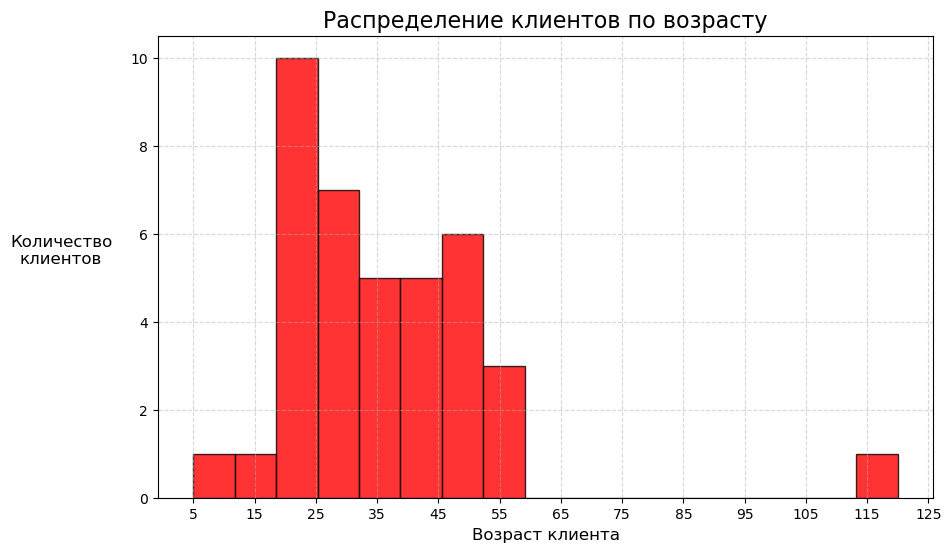

In [150]:
age_data = viz_df['age']

fig_hist, ax_hist = plt.subplots(figsize=(10, 6))

# Построение гистограммы на объекте ax
ax_hist.hist(
    age_data, 
    bins=17, # Количество корзин, чтобы четче увидеть распределение
    color='red', 
    edgecolor='black', 
    alpha=0.8
)

# Подписи осей и заголовок
ax_hist.set_ylabel('Количество\nклиентов', rotation=0, labelpad=50, fontsize=12)
ax_hist.set_xlabel('Возраст клиента', fontsize=12)
ax_hist.set_title('Распределение клиентов по возрасту', fontsize=16)

# Настройка делений
ax_hist.set_xticks(range(5, 130, 10)) 

# Настройка сетки
ax_hist.grid(alpha=0.5, linestyle='--')

# Отображение графика
plt.show()

In [151]:
fig_hist.savefig('figures/age_hist.png', bbox_inches='tight')

График демонстрирует распределение клиентов по возрасту. Выбрано 17 bins для того, чтобы лучше увидеть распределение данных.  
Судя по графику, можно сделать вывод, что возраст большей части клиентов находится в диапазоне от 20 до 50.

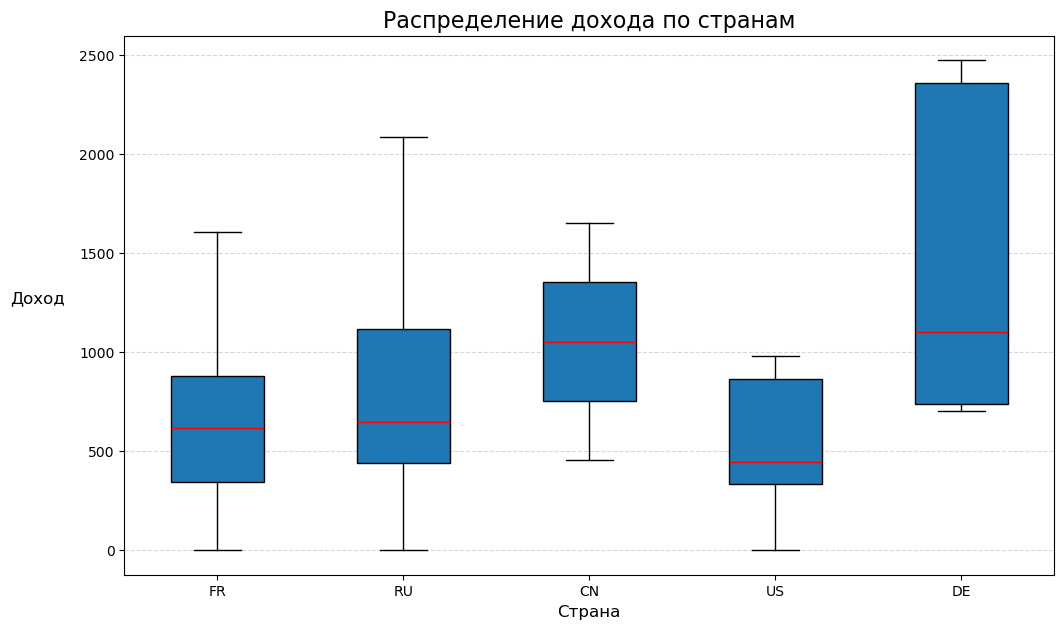

In [148]:
fig_bp, ax_bp = plt.subplots(figsize=(12, 7))

# Подготовка данных: список доходов для каждой страны
countries = viz_df['country'].unique()
data_to_plot = [viz_df[viz_df['country'] == c]['revenue'].values for c in countries]

ax_bp.boxplot(data_to_plot,
              tick_labels=countries,
              patch_artist=True, # Заливка цветом
              medianprops={'color': 'red'}) # Цвет медианы

# Подписи осей и заголовок
ax_bp.set_title('Распределение дохода по странам', fontsize=16)
ax_bp.set_ylabel('Доход', rotation=0, labelpad=30, fontsize=12)
ax_bp.set_xlabel('Страна', fontsize=12)
ax_bp.grid(axis='y', alpha=0.5, linestyle='--')

# Отображение графика
plt.show()

In [160]:
fig_bp.savefig('figures/country-revenue_box.png', bbox_inches='tight')

График демонстрирует распределение доходов по каждой стране при помощи boxplot.  
Судя по графику, можно сказать, что наибольшие доходы от немецких клиентов, которые также и распределены без сильно отклоняющихся значений. В России наоборот умы наиболее длинные, что говорит о наличии сильно отклоняющихся значений. В Китае распределение прибыли похоже на нормальное.  
В целом, ни у одной страны нет выбросов.

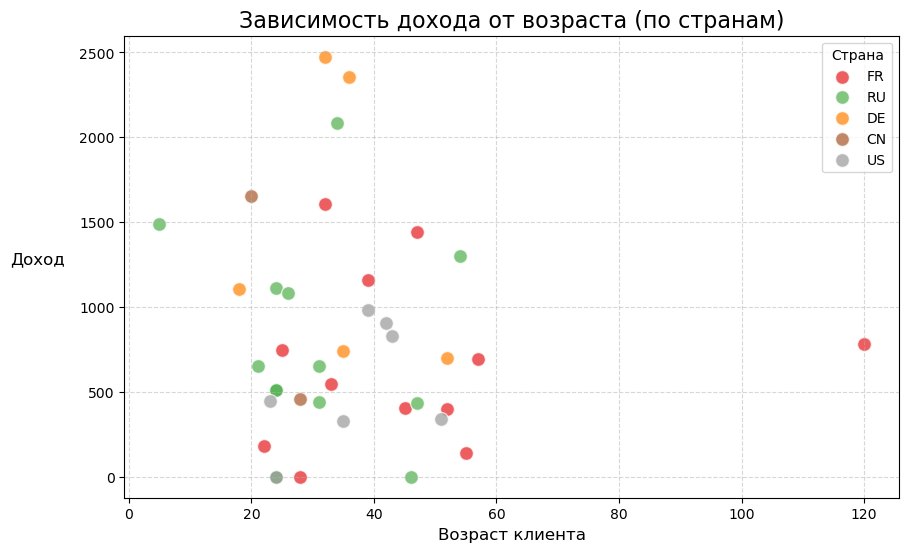

In [158]:
fig_sc, ax_sc = plt.subplots(figsize=(10, 6))

countries = df['country'].unique()
# Используем качественную цветовую карту для различимых цветов
cmap = plt.colormaps.get_cmap('Set1')
# resampled используется для получения нужного количества различимых цветов из Set1
colors = cmap.resampled(len(countries))  

for i, country in enumerate(countries):
    subset = viz_df[viz_df['country'] == country]
    ax_sc.scatter(subset['age'], subset['revenue'], 
                 label=country, 
                 color=colors(i), 
                 s=100, # Размер точек увеличен для видимости
                 alpha=0.7,
                 edgecolors='w') # Белые границы для точек

# Подписи осей и заголовок
ax_sc.set_title('Зависимость дохода от возраста (по странам)', fontsize=16)
ax_sc.set_xlabel('Возраст клиента', fontsize=12)
ax_sc.set_ylabel('Доход', rotation=0, labelpad=30, fontsize=12)
ax_sc.legend(title='Страна', loc='upper right')
ax_sc.grid(alpha=0.5, linestyle='--')

plt.show()

In [159]:
fig_sc.savefig('figures/age-revenue_scatter.png', bbox_inches='tight')

Для демонстрации зависимости дохода от возраста по странам выбрана диаграмма рассеяния с отображением легенды с соответствием цветов и стран.  
По диаграмме можно увидеть, что корреляции между возрастом и доходом нет. Также данные находятся довольно кучно, в возрастном диапазоне от 20 до 60. Также можно заметить выброс - 120 лет у некого клиента из Франции.